In [16]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Concatenate, Flatten, Dense,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
(train_dt, train_lbls), (test_dt, test_lbls) = cifar10.load_data()
train_dt, test_dt = train_dt / 255.0, test_dt / 255.0

In [25]:

def module_inception(prev_layer):
    conv1x1 = Conv2D(16, (1, 1), padding='same', activation='relu')(prev_layer)
    conv1x1 = BatchNormalization()(conv1x1)

    conv3x3_reduce = Conv2D(16, (1, 1), padding='same', activation='relu')(prev_layer)
    conv3x3_reduce = BatchNormalization()(conv3x3_reduce)
    conv3x3 = Conv2D(32, (3, 3), padding='same', activation='relu')(conv3x3_reduce)
    conv3x3 = BatchNormalization()(conv3x3)

    conv5x5_reduce = Conv2D(16, (1, 1), padding='same', activation='relu')(prev_layer)
    conv5x5_reduce = BatchNormalization()(conv5x5_reduce)
    conv5x5 = Conv2D(32, (5, 5), padding='same', activation='relu')(conv5x5_reduce)
    conv5x5 = BatchNormalization()(conv5x5)

    maxpool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(prev_layer)
    pool_proj = Conv2D(16, (1, 1), padding='same', activation='relu')(maxpool)
    pool_proj = BatchNormalization()(pool_proj)

    return Concatenate(axis=-1)([conv1x1, conv3x3, conv5x5, pool_proj])

In [26]:
inp_layer = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), padding='same', activation='relu')(inp_layer)
x = module_inception(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outp_layer = Dense(10, activation='softmax')(x)

In [28]:
model = Model(inputs=inp_layer, outputs=outp_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dt, train_lbls, epochs=10, batch_size=64, validation_data=(test_dt, test_lbls))

Epoch 1/10
782/782 [==============================] - 27s 16ms/step - loss: 1.5255 - accuracy: 0.4734 - val_loss: 1.7727 - val_accuracy: 0.4105
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 1.0025 - accuracy: 0.6416 - val_loss: 1.0390 - val_accuracy: 0.6335
Epoch 3/10
782/782 [==============================] - 11s 15ms/step - loss: 0.8178 - accuracy: 0.7150 - val_loss: 1.0190 - val_accuracy: 0.6480
Epoch 4/10
782/782 [==============================] - 11s 14ms/step - loss: 0.6810 - accuracy: 0.7648 - val_loss: 1.0161 - val_accuracy: 0.6620
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 0.5522 - accuracy: 0.8096 - val_loss: 1.0818 - val_accuracy: 0.6592
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 0.4367 - accuracy: 0.8500 - val_loss: 1.1698 - val_accuracy: 0.6593
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.3435 - accuracy: 0.8814 - val_loss: 1.2326 - val_accuracy:

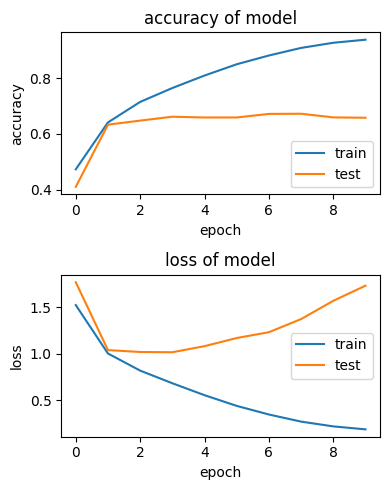

In [36]:
plt.figure(figsize=(4, 5))

# Plot training & validation accuracy values
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='lower right')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss of model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='center right')
plt.tight_layout()
plt.show()